In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, CategoryEncoding, Input
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import tensorflow_datasets as tfds

In [3]:
import pandas as pd

In [4]:
# OPTIONAL: limit NVRAM Usage on GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [5]:
# Initialise directories
data_dir = 'data'
image_exts = ['jpeg', 'jpg']

In [6]:
# Remove corrupt images

for image_class in os.listdir(data_dir):
    
    try:

        for image in os.listdir(os.path.join(data_dir, image_class)):
            
            image_path = os.path.join(data_dir, image_class, image)

            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)

                if tip not in image_exts:
                    print(f'Image not in ext list {image_path}')
                    os.remove(image_path)

            except Exception as e:
                print(f'Issue with image {image_path}')
                os.remove(image_path)

    except NotADirectoryError:              # Checks wheter dir or .DS_Store
        pass

In [5]:
#tf.keras.utils.image_dataset_from_directory??

In [7]:
# Load data
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(480, 640), label_mode='categorical')

Found 10612 files belonging to 2 classes.
Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [8]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 480, 640, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [29]:
# Inspect data

# Convert data into numpy iterator
data_iterator = data.as_numpy_iterator()

# Convert into batch
batch = data_iterator.next()

# Image 0 represented as numpy array
batch[0].shape

(32, 480, 640, 3)

In [10]:
y = []
for batch in data.as_numpy_iterator():
    
    y += [batch[1]]


display(y)

[array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 array([[1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1.

In [11]:
def get_counts(y):
    r = {0:0, 1:0}
    for a in y:
        unique, counts = np.unique(a,return_counts=True)
        d = dict(zip(unique, counts))
        for key in d.keys():
            r[key] += d[key]
    return r


In [18]:
y = []
for batch in data.as_numpy_iterator():
    print(batch[1])
    y += [batch[1]]


display(get_counts(y))


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.

{0: 10612, 1: 10612}

In [100]:
489/1623

0.30129390018484287

In [98]:
451/1661

0.271523178807947

In [96]:
1429/4939

0.289329823850982

In [24]:
batch[0][:1]

array([[[[  4.,   4.,   4.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.],
         ...,
         [ 31.,  17.,  14.],
         [ 35.,  22.,  16.],
         [ 40.,  27.,  21.]],

        [[  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  4.,   4.,   4.],
         ...,
         [ 40.,  26.,  23.],
         [ 44.,  31.,  25.],
         [ 47.,  34.,  28.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  4.,   4.,   4.],
         ...,
         [ 44.,  30.,  27.],
         [ 54.,  41.,  35.],
         [ 56.,  43.,  37.]],

        ...,

        [[156., 124., 135.],
         [154., 122., 133.],
         [150., 118., 129.],
         ...,
         [190., 158., 169.],
         [191., 159., 170.],
         [192., 160., 171.]],

        [[149., 119., 129.],
         [151., 121., 131.],
         [148., 118., 128.],
         ...,
         [188., 158., 168.],
         [190., 158., 169.],
         [189., 157., 168.]],

        [[150., 120., 130.],
       

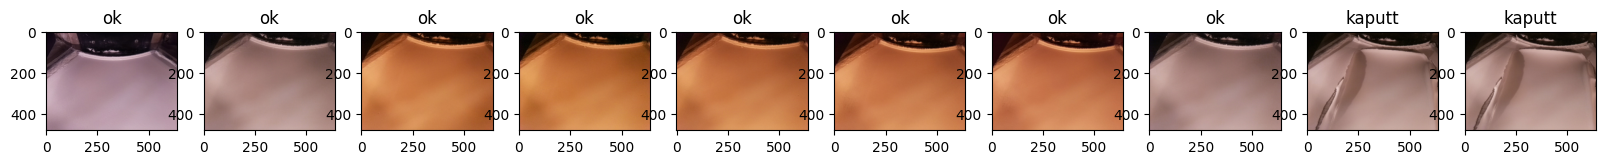

In [39]:
# Get another batch from iterator
batch = data_iterator.next()

n = 10
# Check integer assigned to class
fig, ax = plt.subplots(ncols=n, figsize=(20,20))

for idx, img in enumerate(batch[0][:n]):
    ax[idx].imshow(img.astype(int))
    l = "ok"
    if batch[1][idx][1] == 1:
        l = "defect"
    ax[idx].title.set_text(l)

# Class 0 = ok
# Class 1 = overheating

In [9]:
# Preprocess data

# Different options in documentation
# tf.data.Dataset
# .map allows accesing items in pipeline

# Scale data
#data = data.map(lambda x, y: (x/479, y))

# TODO check me l8r

In [40]:
# Number of batches
len(data)

332

In [41]:
# Split data
train_size = int(len(data) * 0.6)
test_size = int(len(data) * 0.2)
val_size = int(len(data) * 0.2) 

In [42]:
val_size + train_size + test_size

331

In [43]:
val_size

66

In [44]:
test_size

66

In [45]:
train_size

199

In [46]:
# Allocate training/validating/testing sizes
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [47]:
# TODO check data

In [19]:
# Model architecture for testing
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(480, 640, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), 1, activation='relu'))
model.add(Conv2D(512, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))           # mapping to 0 or 1

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 317, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 158, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 156, 256)     295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 114, 154, 256)     5

In [65]:
# Model architecture
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation='relu',input_shape=(480, 640, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))           # mapping to 0 or 1

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 478, 638, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 239, 319, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 237, 317, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 118, 158, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 116, 156, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 58, 78, 64)      

In [66]:
# Compile model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [67]:
# Train the model
logdir = 'logs'

# Callback to save tensorboard log to logdir
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
# Training using model.fit
hist = model.fit(train, epochs=2, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/2
199/199 [==============================] - 57s 279ms/step - loss: 0.1581 - accuracy: 0.9953 - val_loss: 9.6053e-04 - val_accuracy: 1.0000
Epoch 2/2
199/199 [==============================] - 55s 275ms/step - loss: 1.2113e-04 - accuracy: 1.0000 - val_loss: 2.0171e-05 - val_accuracy: 1.0000


In [56]:
# TODO check predictions

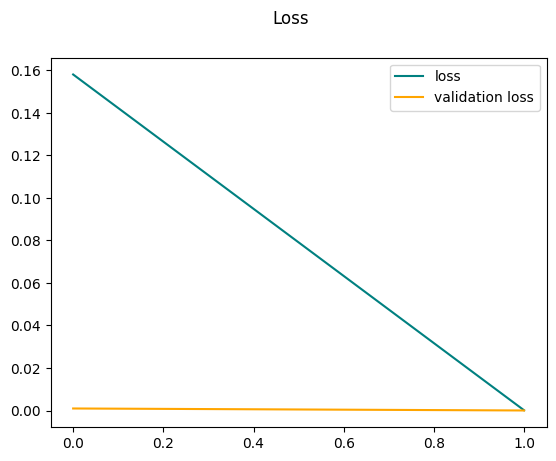

In [70]:
# Plot performance
# hist.history

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='validation loss')
fig.suptitle('Loss')
plt.legend(loc='upper right')
plt.show()

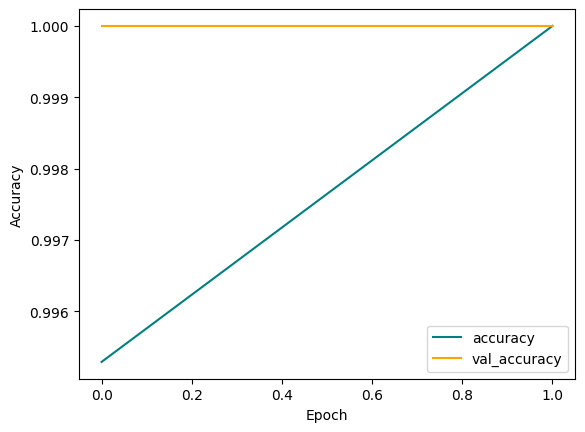

In [71]:
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [59]:
# Evaluate model performance
precision = Precision()
recall = Recall()
bin_acc = BinaryAccuracy()

1/1 [==============================] - 0s 34ms/step


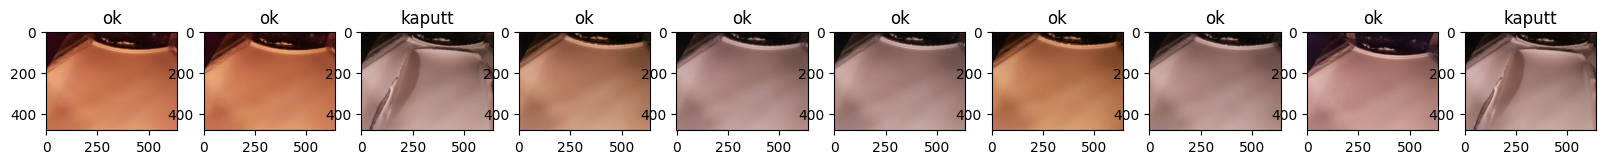

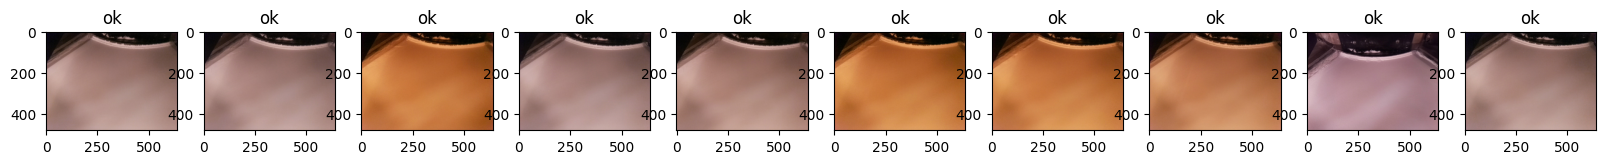

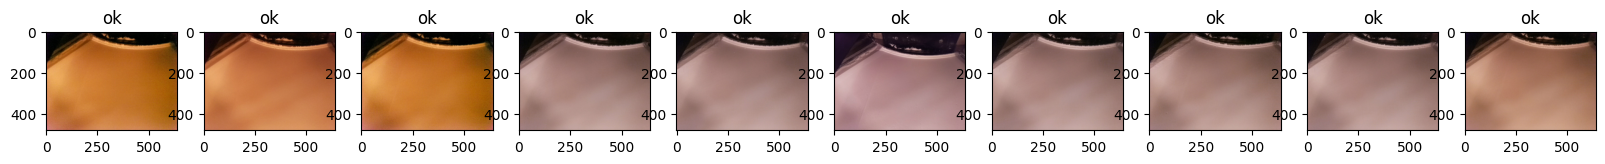

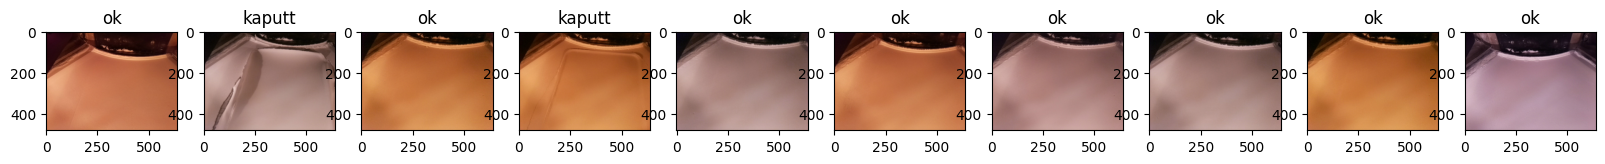

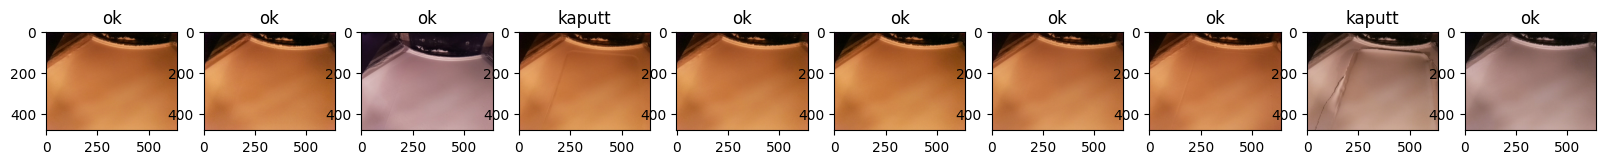

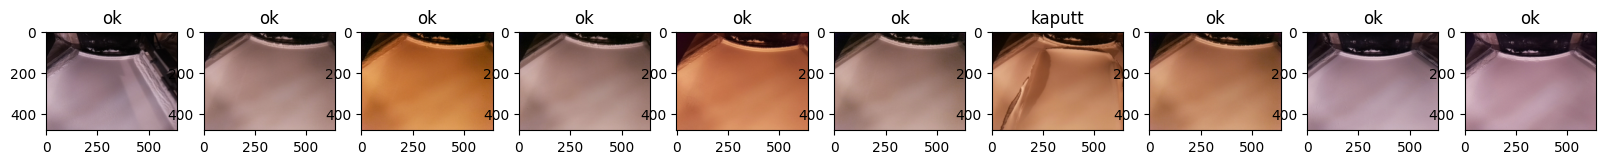

In [80]:
figs = 0
for batch in test.as_numpy_iterator():
    figs += 1
    # Check integer assigned to class

    X, y = batch

    yhat = model.predict(X)

    n = 10
    fig, ax = plt.subplots(ncols=n, figsize=(20,20))


    for idx, img in enumerate(batch[0][:n]):
        ax[idx].imshow(img.astype(int))
        pred = np.around(np.array(yhat[idx]),2)
        l = "ok"
        if batch[1][idx][1] > 0:
            l = "kaputt"
        ax[idx].title.set_text(l)

    if figs > 5:
        break
    
    

    

In [61]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    bin_acc.update_state(y, yhat)

1/1 [==============================] - 0s 30ms/step


In [62]:
print(f'(Precision = {precision.result()}\tRecall = {recall.result()}\tBinary Accuracy = {bin_acc.result()})')

(Precision = 1.0	Recall = 1.0	Binary Accuracy = 1.0)


In [29]:
# Save the model
model.save(os.path.join('models', 'overheating_clean_dataset=230417_epochs=20.h5'))     # enter name of model